<a href="https://colab.research.google.com/github/khanhthanhh9/Deep-Learning-Model/blob/main/Songs_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.4MB/s 
     |████████████████████████████████| 204kB 10.2MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 1.2MB 12.5MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# key = os.environ.get('AZURE_SEARCH_KEY', '455fc18d0b0c42b384ee21cabcc4dc31')

In [ ]:
# results = search_images_bing(key, 'Vietnam Women')
# ims = results.attrgot('contentUrl')
# len(ims)

In [ ]:
# doc(L.attrgot)

In [ ]:
# import os
# p = r"gdrive/MyDrive/ColabNotebooks/images"

# cwd = os.getcwd()  # Get the current working directory (cwd)
# files = os.listdir(p)  # Get all the files in that directory
# print("Files in %r: %s" % (p, files))

In [4]:
song_types = 'pop','rockalt','jazz'
# path = untar_data()
path = '/content/gdrive/MyDrive/ColabNotebooks/images/music'
# 
# print(os.listdir(os.getcwd() + path))
path = Path(path)
# Path.exists(path)

In [ ]:
# path = untar_data(URLs.PETS)/'images'

# print(path)

In [ ]:
# ??Path

In [ ]:
# import os
# print(os.listdir('content'))

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in song_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         # results = search_images_bing(key, f'{o} women')
#         # download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
# Path.cwd()

In [ ]:
# fns = get_image_files(path)
# fns

In [ ]:
# failed = verify_images(fns)
# failed

In [ ]:
# failed.map(Path.unlink);

In [5]:
song_png = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=None)

In [7]:
dls = song_png.dataloaders(path)

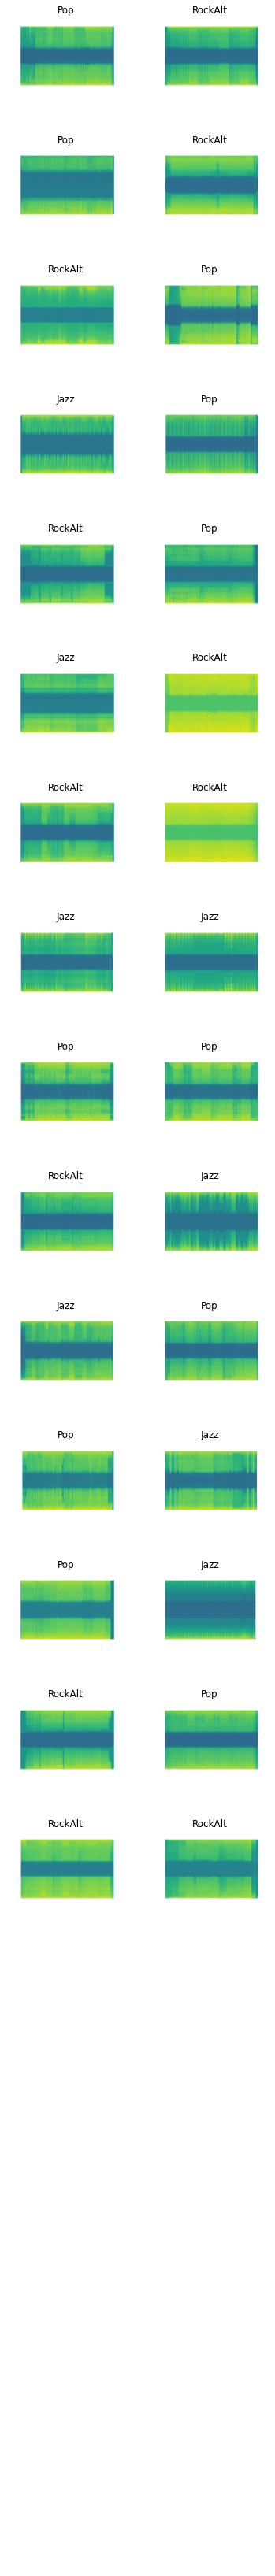

In [8]:
dls.valid.show_batch(max_n=80, nrows=20)

In [9]:
song_png = song_png.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms= None)
dls = song_png.dataloaders(path)

In [ ]:
# song_png = song_png.new(
#   item_tfms=)
# dls = song_png.dataloaders(path)

# 

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.027681,2.547535,0.633333,00:18


epoch,train_loss,valid_loss,error_rate,time
0,2.009458,2.061222,0.633333,00:08
1,2.143316,1.697483,0.633333,00:08
2,1.860543,1.275910,0.500000,00:08
3,1.592504,1.043295,0.466667,00:08
4,1.450206,0.941100,0.466667,00:09
5,1.344434,0.885857,0.533333,00:09
6,1.260522,0.893345,0.533333,00:09
7,1.165326,0.898412,0.500000,00:09


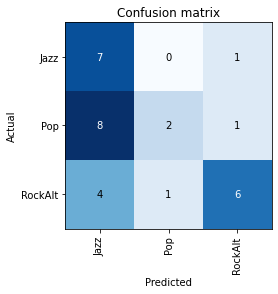

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

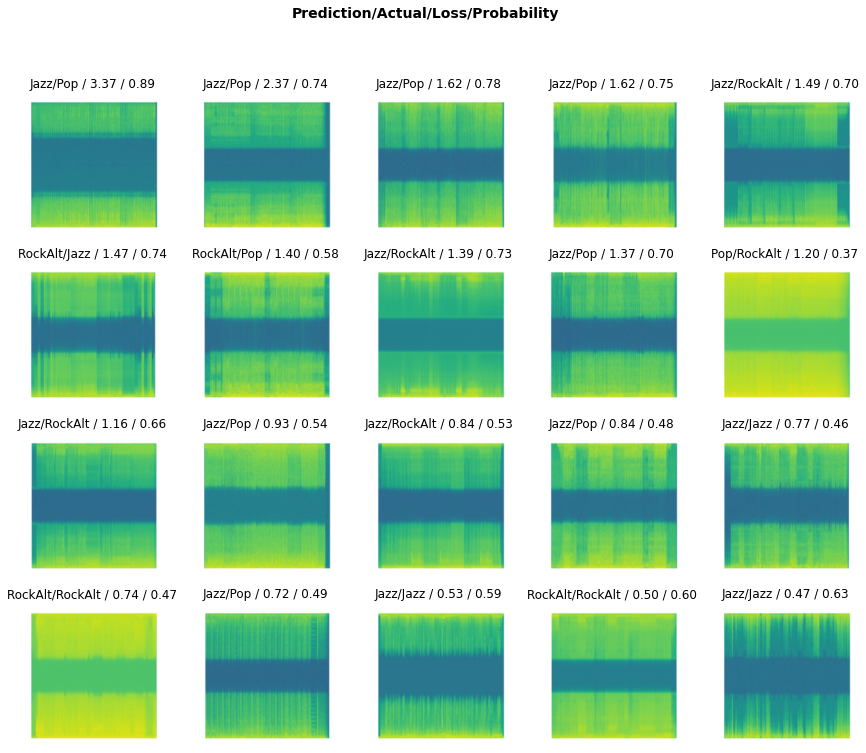

In [12]:
interp.plot_top_losses(20, nrows=4)

In [13]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [14]:
learn.export()

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [16]:
learn_inf = load_learner(path/'export.pkl')

In [17]:
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [20]:
img = PILImage.create(btn_upload.data[-1])

    


In [21]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(256,256))
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [22]:
btn_run.on_click(on_click_classify)

In [23]:
btn_upload = widgets.FileUpload()

In [24]:
VBox([widgets.Label('Select your song!'), 
      btn_upload, btn_run, out_pl, lbl_pred])